<a href="https://www.kaggle.com/code/mosesmoncy/2022-congressional-earmarks-agency-prediction?scriptVersionId=126874903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The Congressional Budget Office regularly publishes reports presenting its baseline projections of what the federal budget and the economy would look like in the current year and over the next 10 years if current laws governing taxes and spending generally remained unchanged. This report is the latest in that series.

In this project, the Congressional Budget Office describes its projections of the federal budget and the U.S. economy under current law for this year and the decade that follows. Cumulative deficits projected for the 2022–2031 period are larger than those in the projections that CBO published last July. Revenues have increased in CBO’s projections, buoyed in part by the stronger-than-anticipated economy, which CBO expects to persist. But higher projected inflation and interest rates have pushed up outlays for interest payments on federal debt and for benefit programs such as Social Security. Recently enacted legislation has increased CBO’s projections of discretionary spending.

Here, the model is created to predict using classification models, which 'agency' is spent according to the source, credit account, project based operation, location, amount paid, house of representative and requestor senate.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/earmarks-dataset/earmarks_combined.csv')
a

,source_approps_bill_fullname,source_approps_bill_abbrv,agency,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
0,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Missouri State University,Ozarks Health and Life Science Center,"Springfield, MO",20000000.0,NaN,Blunt
1,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,University of Maine,Green Engineering and Materials Research F...,"Orono, ME",10000000.0,NaN,Collins
2,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Burlington Technical Center,Burlington Aviation Technology Center Facility,"Burlington, VT",10000000.0,NaN,Leahy
3,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Fort Hays State University,Renovation of Forsyth Library,"Hays, KS",17000000.0,NaN,Moran
4,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Kansas State University Salina Aerospace and T...,Acquisition and Renovation of Aerospace Simula...,"Salina, KS",4750000.0,NaN,Moran
...,...,...,...,...,...,...,...,...,...,...
4970,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,Shepherd University,Shepherd University East Loop: Environmental R...,WV,1475000.0,NaN,Capito
4971,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,Semper Liberi,Mountaineer Recovery Village— Phase 1,WV,1500000.0,NaN,Capito
4972,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,Hardy County Rural Development Authority,Crites Industrial Park,WV,2268000.0,NaN,"Capito,\r\nManchin"
4973,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,City of Mount Hope,Mount Hope Facilities upgrade,WV,2393000.0,NaN,Capito


In [3]:
# read first five data
a.head()

,source_approps_bill_fullname,source_approps_bill_abbrv,agency,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
0,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Missouri State University,Ozarks Health and Life Science Center,"Springfield, MO",20000000.0,NaN,Blunt
1,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,University of Maine,Green Engineering and Materials Research F...,"Orono, ME",10000000.0,NaN,Collins
2,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Burlington Technical Center,Burlington Aviation Technology Center Facility,"Burlington, VT",10000000.0,NaN,Leahy
3,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Fort Hays State University,Renovation of Forsyth Library,"Hays, KS",17000000.0,NaN,Moran
4,"Commerce, Justice, Science, And Related Agencies",CJS_CDS,DOC,NIST—Construction,Kansas State University Salina Aerospace and T...,Acquisition and Renovation of Aerospace Simula...,"Salina, KS",4750000.0,NaN,Moran


In [4]:
# read last five data
a.tail()

,source_approps_bill_fullname,source_approps_bill_abbrv,agency,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
4970,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,Shepherd University,Shepherd University East Loop: Environmental R...,WV,1475000.0,NaN,Capito
4971,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,Semper Liberi,Mountaineer Recovery Village— Phase 1,WV,1500000.0,NaN,Capito
4972,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,Hardy County Rural Development Authority,Crites Industrial Park,WV,2268000.0,NaN,"Capito,\r\nManchin"
4973,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,City of Mount Hope,Mount Hope Facilities upgrade,WV,2393000.0,NaN,Capito
4974,Department Of Transportation,THUD,Department of Housing and Urban Development,Community Development Fund,City of Smithers,Smithers Integrated Trail System,WV,4688000.0,Miller (WV),"Capito,\r\nManchin"


In [5]:
a.describe

<bound method NDFrame.describe of                           source_approps_bill_fullname  \
0     Commerce, Justice, Science, And Related Agencies   
1     Commerce, Justice, Science, And Related Agencies   
2     Commerce, Justice, Science, And Related Agencies   
3     Commerce, Justice, Science, And Related Agencies   
4     Commerce, Justice, Science, And Related Agencies   
...                                                ...   
4970                      Department Of Transportation   
4971                      Department Of Transportation   
4972                      Department Of Transportation   
4973                      Department Of Transportation   
4974                      Department Of Transportation   

     source_approps_bill_abbrv                                       agency  \
0                      CJS_CDS                                          DOC   
1                      CJS_CDS                                          DOC   
2                      CJS_CDS  

In [6]:
a.isna().sum()

source_approps_bill_fullname       0
source_approps_bill_abbrv          0
agency                             0
account                           72
recipient                       1984
project                          856
location                        2676
amount_provided                    1
requestor_house                 2247
requestor_senate                2057
dtype: int64

In [7]:
a.dtypes

source_approps_bill_fullname     object
source_approps_bill_abbrv        object
agency                           object
account                          object
recipient                        object
project                          object
location                         object
amount_provided                 float64
requestor_house                  object
requestor_senate                 object
dtype: object

In [8]:
a.columns

Index(['source_approps_bill_fullname', 'source_approps_bill_abbrv', 'agency',
       'account', 'recipient', 'project', 'location', 'amount_provided',
       'requestor_house', 'requestor_senate'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['source_approps_bill_fullname', 'source_approps_bill_abbrv', 'agency',
       'account', 'recipient', 'project', 'location',
       'requestor_house', 'requestor_senate']
a[cols]=a[cols].apply(la.fit_transform)

In [10]:
a

,source_approps_bill_fullname,source_approps_bill_abbrv,agency,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
0,1,1,11,37,1592,2663,407,20000000.0,400,10
1,1,1,11,37,2546,1596,331,10000000.0,400,36
2,1,1,11,37,209,464,44,10000000.0,400,77
3,1,1,11,37,1123,2953,167,17000000.0,400,89
4,1,1,11,37,1371,54,380,4750000.0,400,89
...,...,...,...,...,...,...,...,...,...,...
4970,4,9,17,6,2041,3198,458,1475000.0,400,24
4971,4,9,17,6,2031,2362,458,1500000.0,400,24
4972,4,9,17,6,1236,1055,458,2268000.0,400,25
4973,4,9,17,6,665,2355,458,2393000.0,400,24


Data Visualisation

<AxesSubplot:xlabel='requestor_senate', ylabel='Count'>

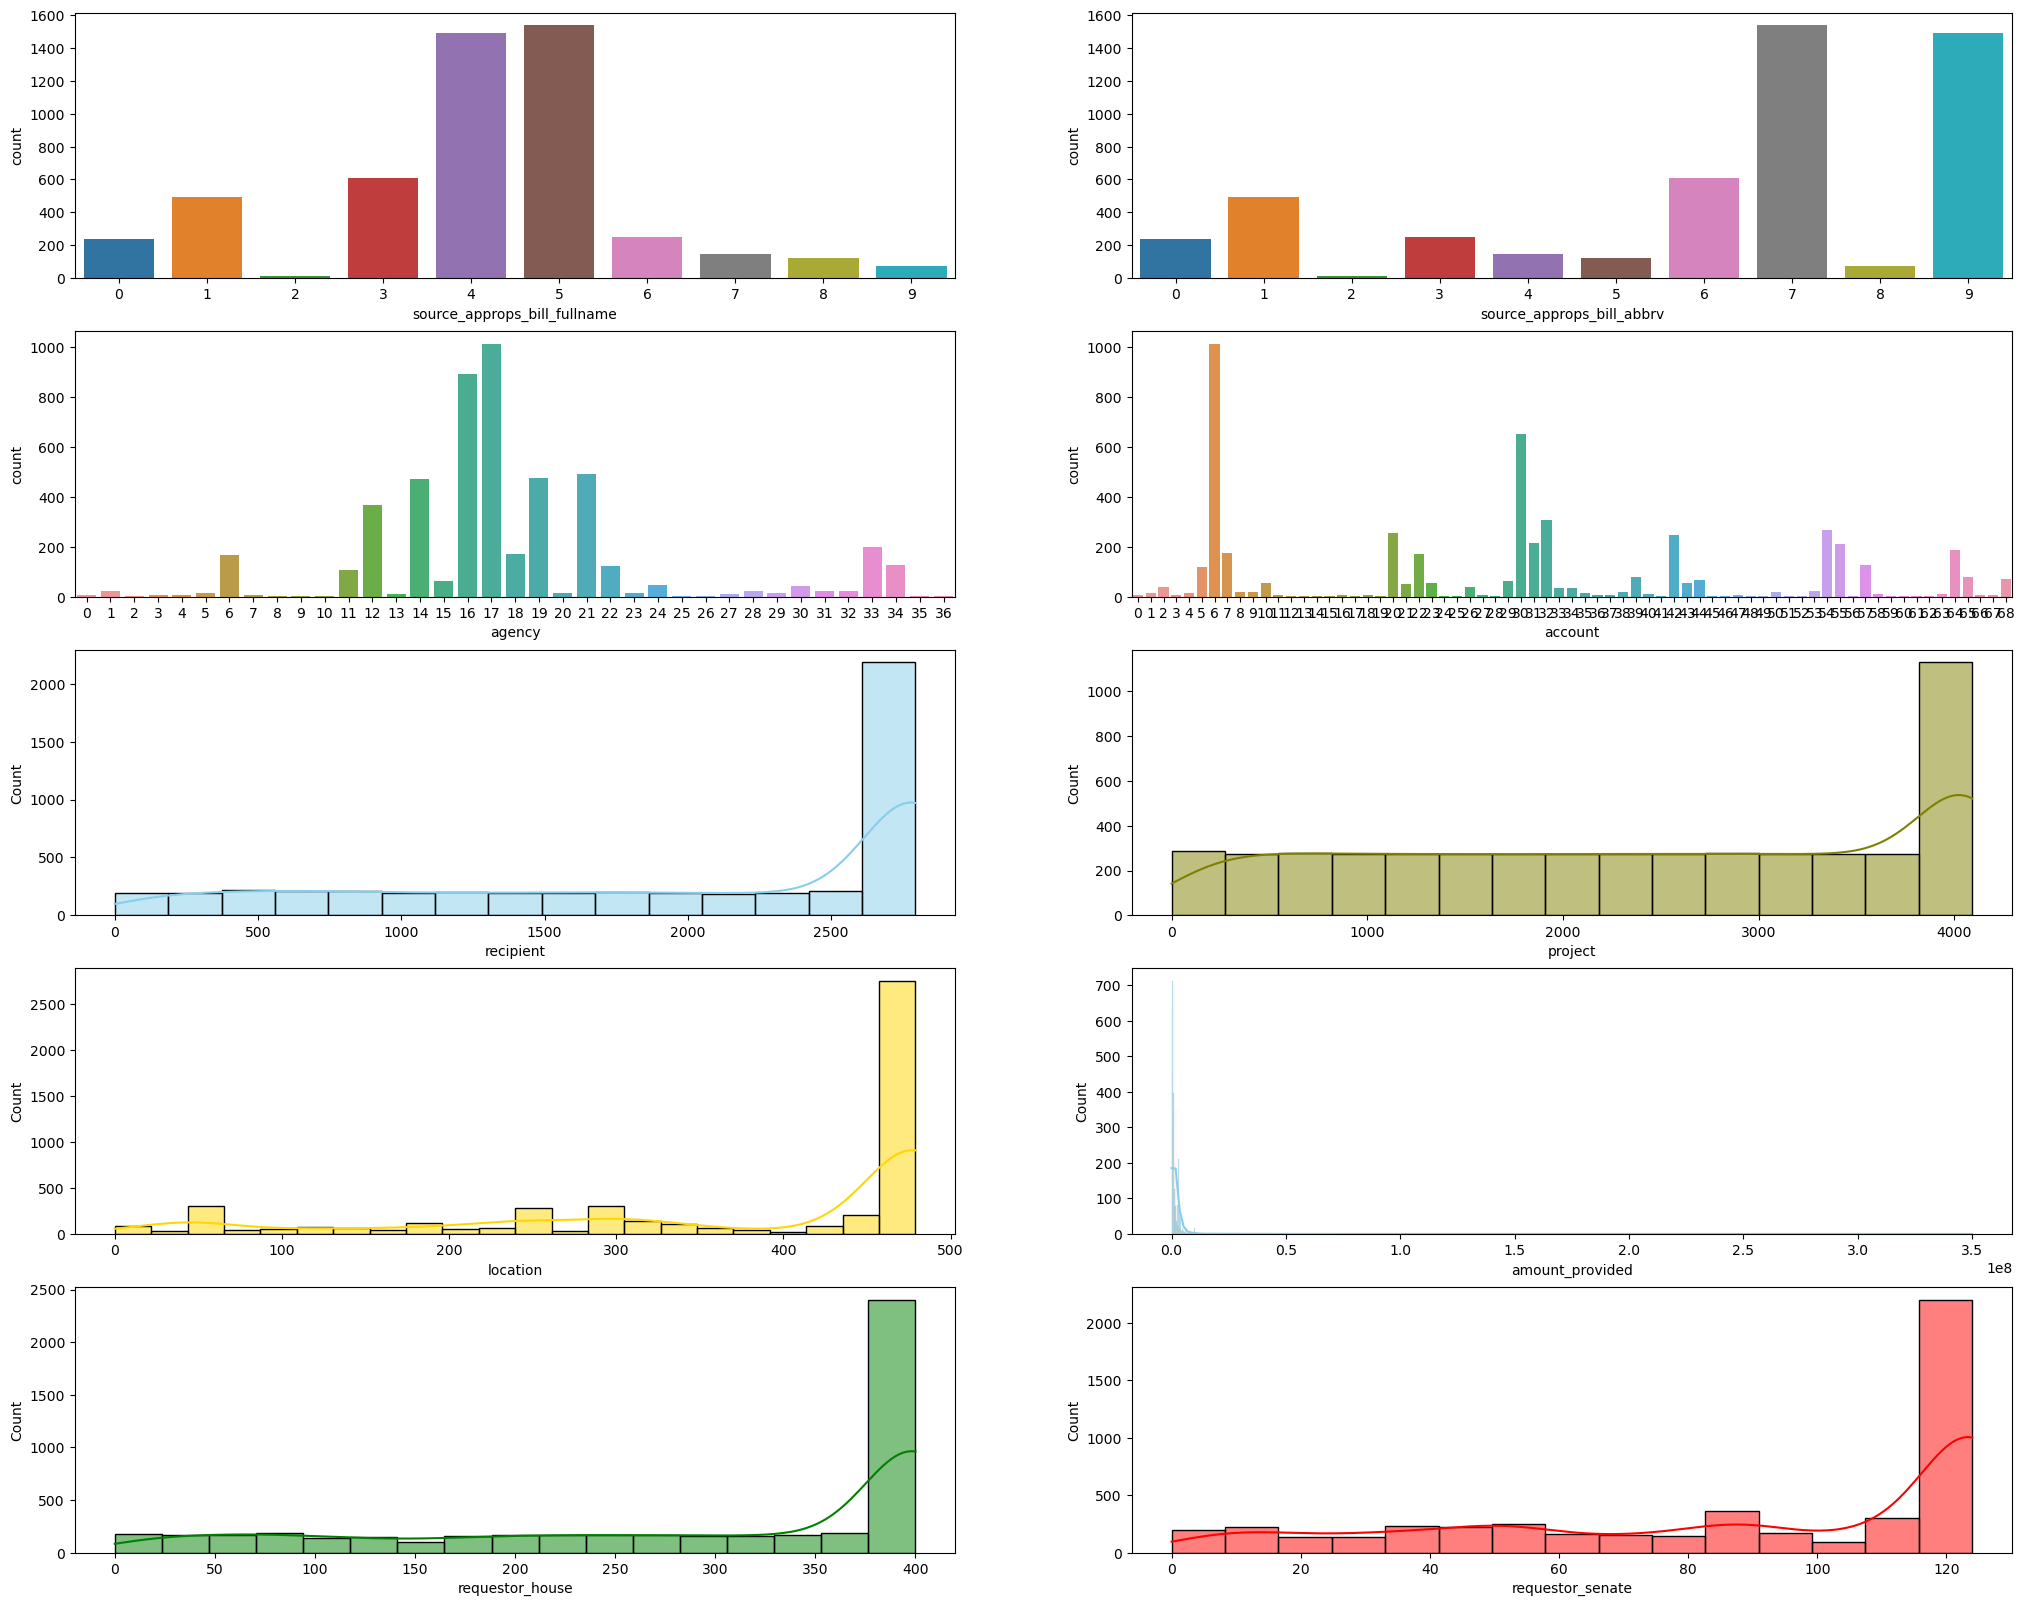

In [11]:
fig, axs = plt.subplots(5, 2, figsize=(25, 20))
sns.countplot(x = a["source_approps_bill_fullname"], ax=axs[0, 0])
sns.countplot(x = a["source_approps_bill_abbrv"], ax=axs[0, 1])
sns.countplot(x = a["agency"], ax=axs[1, 0])
sns.countplot(x = a["account"], ax=axs[1, 1])
sns.histplot(data=a["recipient"], kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=a["project"], kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=a["location"], kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=a["amount_provided"], kde=True, color="skyblue", ax=axs[3, 1])
sns.histplot(data=a["requestor_house"], kde=True, color="green", ax=axs[4, 0])
sns.histplot(data=a["requestor_senate"], kde=True, color="red", ax=axs[4, 1])

In [12]:
a.corr()

,source_approps_bill_fullname,source_approps_bill_abbrv,agency,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
source_approps_bill_fullname,1.000000,0.497166,-0.149076,0.141127,0.301563,-0.014328,0.351382,0.116561,0.009230,-0.022529
source_approps_bill_abbrv,0.497166,1.000000,-0.107047,-0.156030,0.219424,-0.101961,-0.050841,0.015058,-0.093698,0.077399
agency,-0.149076,-0.107047,1.000000,0.106775,-0.133027,0.023991,0.042404,-0.061327,0.053689,-0.004437
account,0.141127,-0.156030,0.106775,1.000000,0.131903,0.189731,0.280516,0.055689,0.058998,-0.056838
recipient,0.301563,0.219424,-0.133027,0.131903,1.000000,-0.017939,0.297257,0.012077,0.009499,-0.020076
project,-0.014328,-0.101961,0.023991,0.189731,-0.017939,1.000000,0.259865,0.017420,0.058669,-0.063553
location,0.351382,-0.050841,0.042404,0.280516,0.297257,0.259865,1.000000,-0.054393,0.065660,-0.072517
amount_provided,0.116561,0.015058,-0.061327,0.055689,0.012077,0.017420,-0.054393,1.000000,0.048285,-0.042765
requestor_house,0.009230,-0.093698,0.053689,0.058998,0.009499,0.058669,0.065660,0.048285,1.000000,-0.432810
requestor_senate,-0.022529,0.077399,-0.004437,-0.056838,-0.020076,-0.063553,-0.072517,-0.042765,-0.432810,1.000000


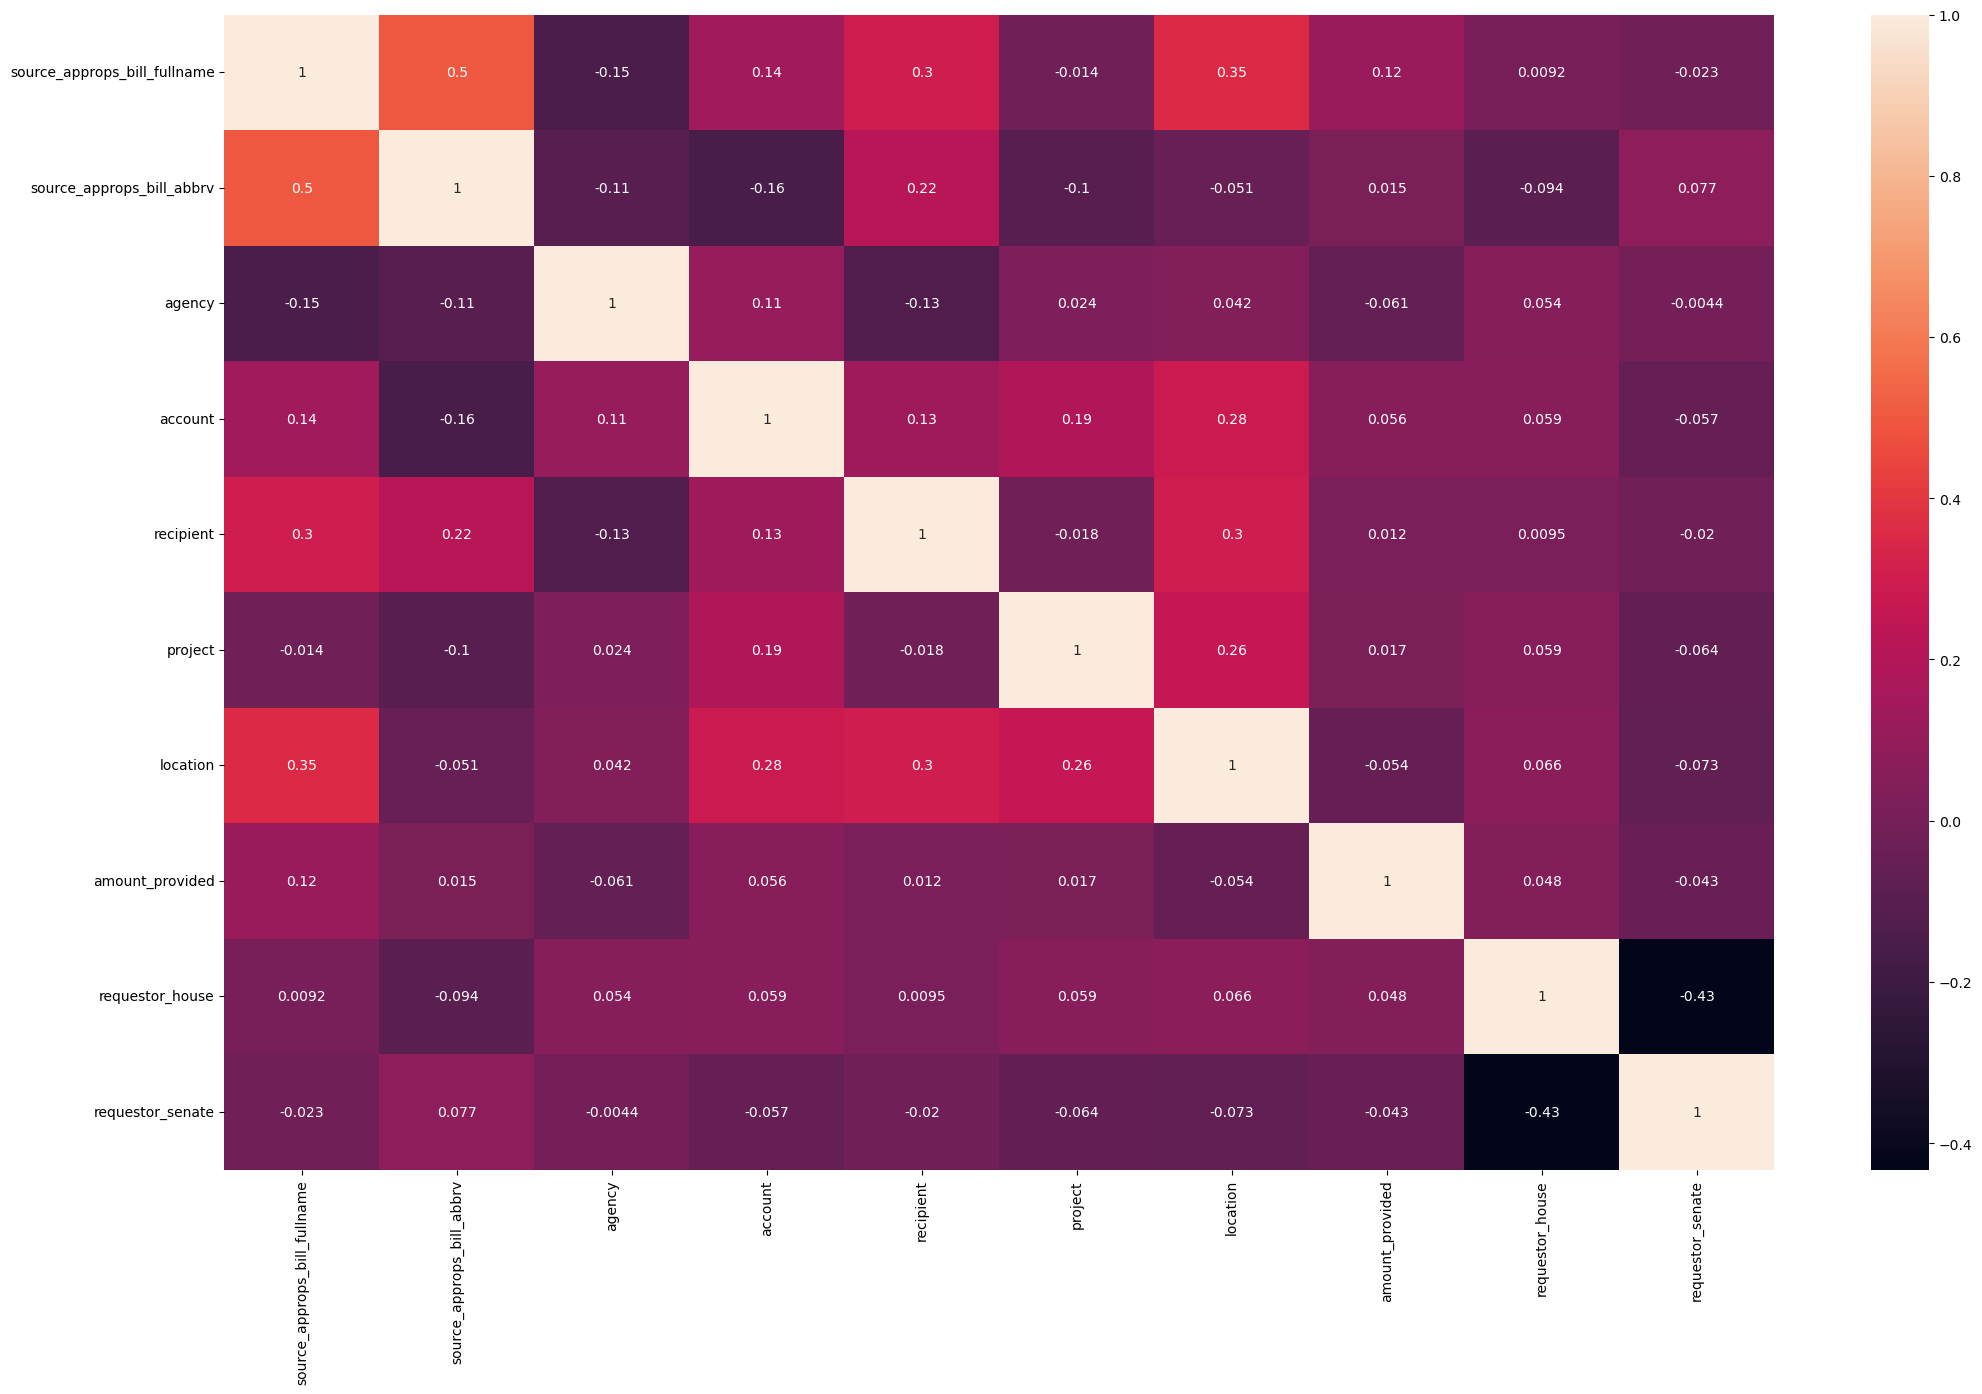

In [13]:
#Correlation matrix
sns.set_style()
plt.figure(figsize=(25,15))
sns.heatmap(a.corr(),annot=True)
plt.show()

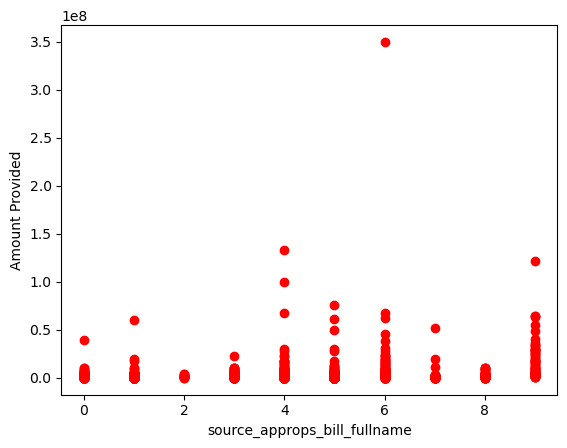

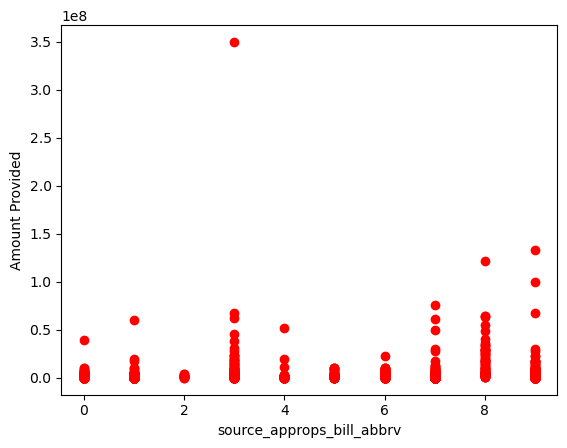

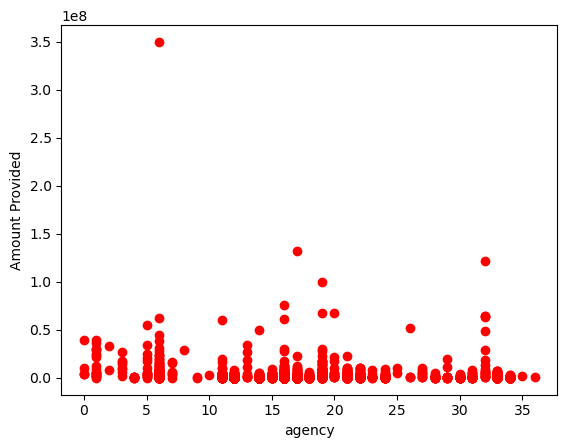

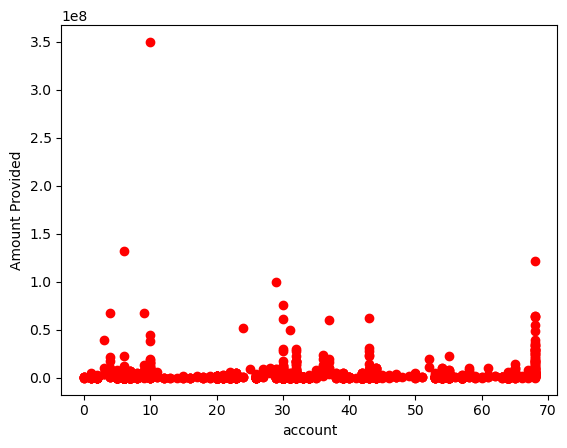

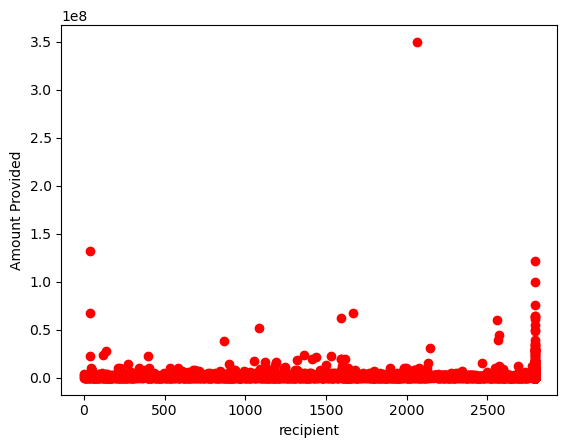

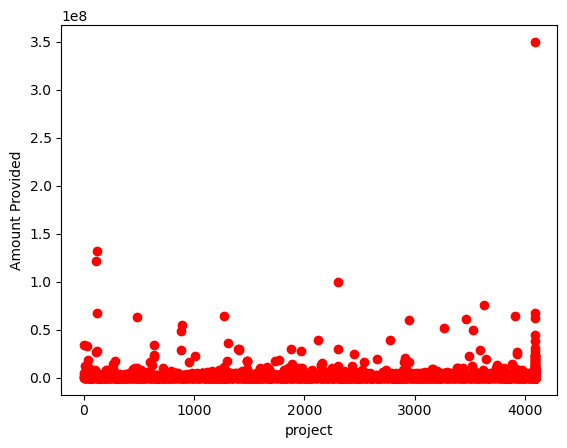

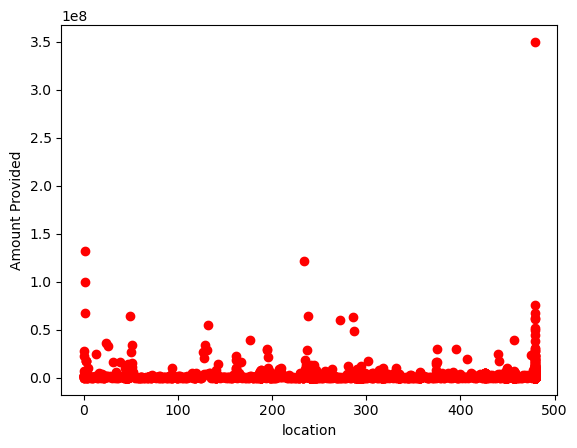

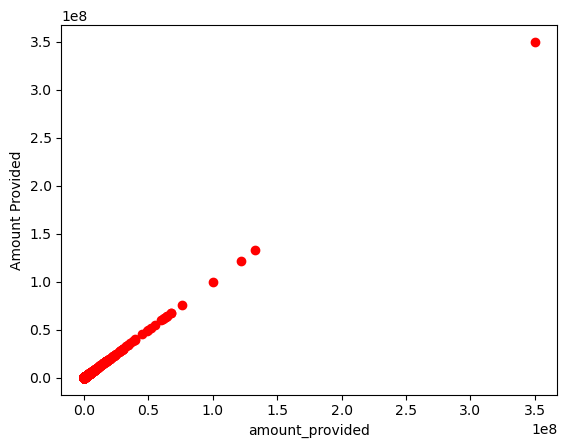

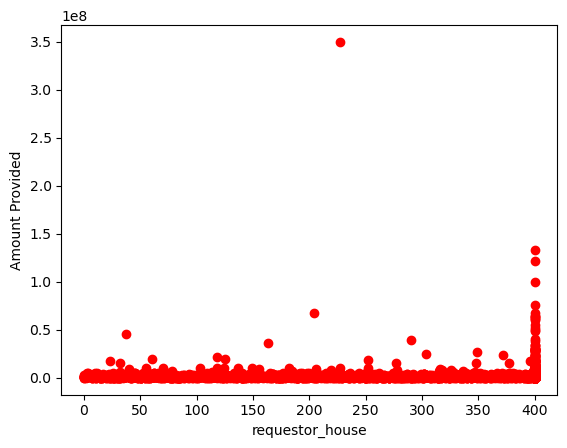

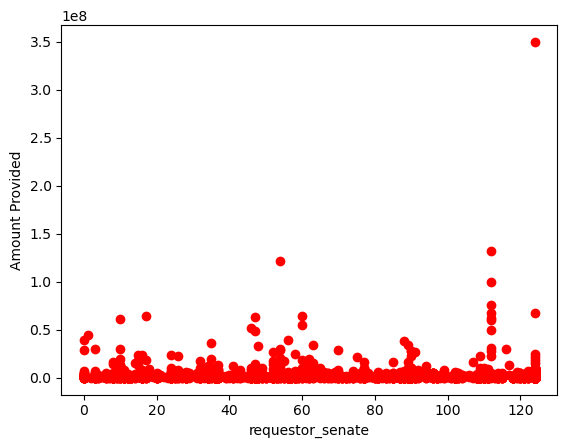

In [14]:
for i in a.columns:
    plt.xlabel(i)
    plt.ylabel("Amount Provided")
    plt.scatter(a[i],a["amount_provided"],color='red')
    plt.show()

In [15]:
a.isna().sum()

source_approps_bill_fullname    0
source_approps_bill_abbrv       0
agency                          0
account                         0
recipient                       0
project                         0
location                        0
amount_provided                 1
requestor_house                 0
requestor_senate                0
dtype: int64

In [16]:
# filling 'amount_provided' with mean() since it has a missing value

a['amount_provided']=a['amount_provided'].fillna(a['amount_provided'].mean())

In [17]:
a.isna().sum()

source_approps_bill_fullname    0
source_approps_bill_abbrv       0
agency                          0
account                         0
recipient                       0
project                         0
location                        0
amount_provided                 0
requestor_house                 0
requestor_senate                0
dtype: int64

In [18]:
# splitting x(inputs) and y(outputs)

x=a.drop(['agency'],axis=1)
y=a["agency"]
x

,source_approps_bill_fullname,source_approps_bill_abbrv,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
0,1,1,37,1592,2663,407,20000000.0,400,10
1,1,1,37,2546,1596,331,10000000.0,400,36
2,1,1,37,209,464,44,10000000.0,400,77
3,1,1,37,1123,2953,167,17000000.0,400,89
4,1,1,37,1371,54,380,4750000.0,400,89
...,...,...,...,...,...,...,...,...,...
4970,4,9,6,2041,3198,458,1475000.0,400,24
4971,4,9,6,2031,2362,458,1500000.0,400,24
4972,4,9,6,1236,1055,458,2268000.0,400,25
4973,4,9,6,665,2355,458,2393000.0,400,24


In [19]:
y

0       11
1       11
2       11
3       11
4       11
        ..
4970    17
4971    17
4972    17
4973    17
4974    17
Name: agency, Length: 4975, dtype: int64

<AxesSubplot:>

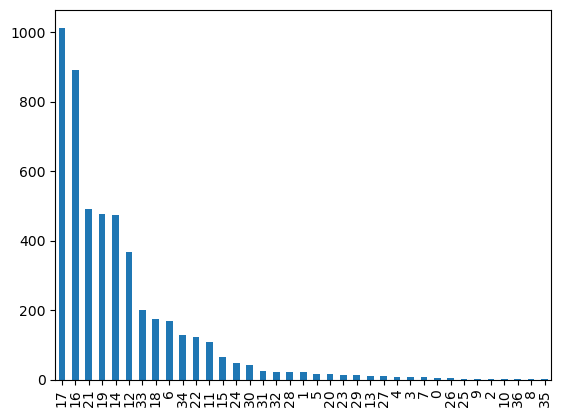

In [20]:
a['agency'].value_counts().plot(kind='bar')

In [21]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,source_approps_bill_fullname,source_approps_bill_abbrv,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
2388,5,7,30,2794,2247,479,800000.0,282,85
1151,8,5,44,234,529,479,189000.0,400,7
4963,4,9,6,2711,187,458,850000.0,400,24
647,0,0,7,1541,2224,426,562500.0,118,124
2883,5,7,64,2794,4054,479,750000.0,280,111
...,...,...,...,...,...,...,...,...,...
4426,4,9,6,1745,2564,242,2000000.0,375,124
466,1,1,42,746,3088,376,482000.0,400,115
3092,5,7,20,2794,2511,479,458000.0,400,108
3772,4,9,32,2794,3397,295,1100000.0,84,52


In [22]:
y_train

2388    16
1151    22
4963    17
647     33
2883    16
        ..
4426    17
466     12
3092    14
3772    19
860      6
Name: agency, Length: 3482, dtype: int64

In [23]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,source_approps_bill_fullname,source_approps_bill_abbrv,account,recipient,project,location,amount_provided,requestor_house,requestor_senate
4749,4.008122,7.983652,7.223876,882.107489,912.098292,335.201058,1.400000e+06,392.213127,35.390252
144,2.589873,2.776854,6.274797,489.526764,2889.612626,83.861574,1.730002e+05,306.854138,123.111325
4095,4.008122,7.983652,7.223876,625.381671,3208.373148,47.104417,1.500000e+06,216.532416,123.111325
4821,4.008122,7.983652,7.223876,751.247247,1313.796504,425.603797,2.000000e+06,51.769716,123.111325
3311,4.480872,6.681953,30.950853,2793.066592,2445.945943,478.255942,2.000000e+06,399.160952,56.833181
...,...,...,...,...,...,...,...,...,...
2420,4.480872,6.681953,30.001774,2793.066592,2447.944442,478.255942,8.000001e+05,240.353530,123.111325
4205,4.008122,7.983652,7.223876,839.153364,3971.799601,119.625295,2.000000e+06,200.651674,123.111325
2297,4.480872,6.681953,30.001774,2793.066592,1640.551020,478.255942,7.750001e+05,281.047932,123.111325
256,2.589873,2.776854,41.390722,1510.436436,2173.150889,258.706432,9.600020e+04,44.821891,123.111325


In [24]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=GaussianNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.004018754186202277
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        34
          12       0.00      0.00      0.00     